## Understanding the dataset

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

print('Number of attributes:', df.shape[1])
print('Number of records:', df.shape[0])

Number of attributes: 35
Number of records: 1470


In [25]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [26]:
# count missing values in each column
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [27]:
df.duplicated().sum()

0

## Data cleaning

In [28]:
# If you find any missing values in the dataset ( nan values) replace those data with the column wise mean.
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)

#If you find any duplicates in the dataset, keep just one copy of the data.
df.drop_duplicates(inplace=True)

# Remember, if any row in the target column (Attrition) is missing, you must drop that row
df.dropna(subset=['Attrition'], inplace=True)

## Creation of input and output features

In [29]:
# You need to split the data into two parts. The “Features” variable will consist of all
# the columns in the dataset except the target column. And the “Labels” variable
# will contain only the column. Atrrition is the target column.

features = df.drop('Attrition', axis=1)
labels = df['Attrition']

features.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


## Conversion of features into numeric values

In [30]:
# Convert the columns into categorical type
for col in features.columns:
    if features[col].dtype == 'object':
        features[col] = features[col].astype('category')


# Perform one hot encoding
features = pd.get_dummies(features)

# # print how any are one hot encoded columns and how many are not
# print('Number of one hot encoded columns:', features.shape[1])

one_hot_encoded = [col for col in features.columns if '_' in col]
not_one_hot_encoded = [col for col in features.columns if col not in one_hot_encoded]

features.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,False,False,True,False,False,False,True,True,False,True
1,49,279,8,1,1,2,3,61,2,2,...,False,True,False,False,False,True,False,True,True,False
2,37,1373,2,2,1,4,4,92,2,1,...,False,False,False,False,False,False,True,True,False,True
3,33,1392,3,4,1,5,4,56,3,1,...,False,True,False,False,False,True,False,True,False,True
4,27,591,2,1,1,7,1,40,3,1,...,False,False,False,False,False,True,False,True,True,False


In [31]:
# Label encoding for the target column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)

labels

array([1, 0, 1, ..., 0, 0, 0])

## Scaling of the features:

In [32]:
# scaling the features, except the one hot encoded columns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# scaler = StandardScaler()
# features[not_one_hot_encoded] = scaler.fit_transform(features[not_one_hot_encoded])

scaler = MinMaxScaler()
features[not_one_hot_encoded] = scaler.fit_transform(features[not_one_hot_encoded])
features

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.547619,0.715820,0.000000,0.25,0.0,0.000000,0.333333,0.914286,0.666667,0.25,...,False,False,True,False,False,False,True,True,False,True
1,0.738095,0.126700,0.250000,0.00,0.0,0.000484,0.666667,0.442857,0.333333,0.25,...,False,True,False,False,False,True,False,True,True,False
2,0.452381,0.909807,0.035714,0.25,0.0,0.001451,1.000000,0.885714,0.333333,0.00,...,False,False,False,False,False,False,True,True,False,True
3,0.357143,0.923407,0.071429,0.75,0.0,0.001935,1.000000,0.371429,0.666667,0.00,...,False,True,False,False,False,True,False,True,False,True
4,0.214286,0.350036,0.035714,0.00,0.0,0.002903,0.000000,0.142857,0.666667,0.00,...,False,False,False,False,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.559771,0.785714,0.25,0.0,0.996613,0.666667,0.157143,1.000000,0.25,...,False,False,False,False,False,True,False,True,True,False
1466,0.500000,0.365784,0.178571,0.00,0.0,0.997097,1.000000,0.171429,0.333333,0.50,...,False,False,False,False,False,True,False,True,True,False
1467,0.214286,0.037938,0.107143,0.50,0.0,0.998065,0.333333,0.814286,1.000000,0.25,...,False,False,False,False,False,True,False,True,False,True
1468,0.738095,0.659270,0.035714,0.50,0.0,0.998549,1.000000,0.471429,0.333333,0.25,...,False,False,True,False,False,True,False,True,True,False


## Correlation Analysis:

In [33]:
labels_df = pd.DataFrame(labels, columns=['Attrition'])
# features = features.loc[:, (features != features.iloc[0]).any()] # remove constant columns
correlation = features.corrwith(labels_df['Attrition'])

correlation

c:\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Age                                 -0.159205
DailyRate                           -0.056652
DistanceFromHome                     0.077924
Education                           -0.031373
EmployeeCount                             NaN
EmployeeNumber                      -0.010577
EnvironmentSatisfaction             -0.103369
HourlyRate                          -0.006846
JobInvolvement                      -0.130016
JobLevel                            -0.169105
JobSatisfaction                     -0.103481
MonthlyIncome                       -0.159840
MonthlyRate                          0.015170
NumCompaniesWorked                   0.043494
PercentSalaryHike                   -0.013478
PerformanceRating                    0.002889
RelationshipSatisfaction            -0.045872
StandardHours                             NaN
StockOptionLevel                    -0.137145
TotalWorkingYears                   -0.171063
TrainingTimesLastYear               -0.059478
WorkLifeBalance                   

In [34]:
# top 20 columns with highest correlation
top_20 = correlation.abs().sort_values(ascending=False).head(20)
features_top_20 = features[top_20.index]

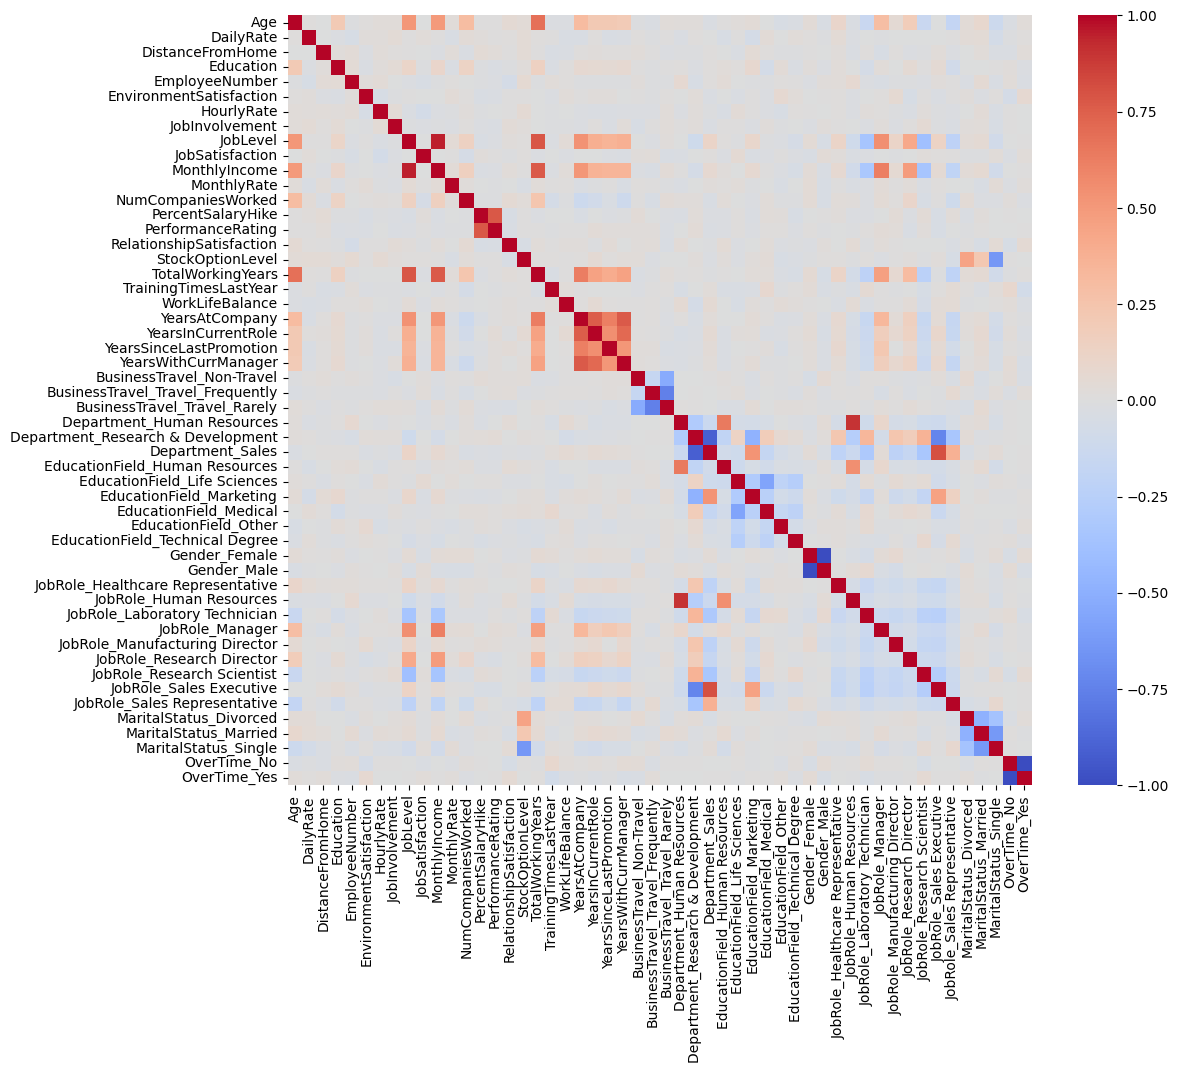

In [35]:
# correlation matrix
correlation_matrix = features.corr()
correlation_matrix = correlation_matrix.dropna(axis=0, how='all').dropna(axis=1, how='all')

import seaborn as sn
plt.figure(figsize=(12, 10))
sn.heatmap(correlation_matrix, annot=False, cmap='coolwarm')

plt.show()

## Pipeline

In [36]:

# Import necessary libraries
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Assume X and y are your input matrices
# X --> (number of rows, number of columns), already scaled
# y --> binary target class (0 or 1)
# Dummy example data (replace these with your actual data)
# X = np.random.rand(100, 5) # Example feature matrix with 100 rows and 5 columns
# y = np.random.randint(0, 2, 100) # Example binary target vector
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( features_top_20, labels, test_size=0.2, random_state=42)
# Step 2: Initialize the Logistic Regression classifier
clf = LogisticRegression()
# Step 3: Train the classifier on the training data
clf.fit(X_train, y_train)
# Step 4: Make predictions on the test set
y_pred = clf.predict(X_test)
# Step 5: Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression classifier: {accuracy:.2f}")

Accuracy of Logistic Regression classifier: 0.87
